overview of data cleaning.

In [5]:
# we have to load the dataset
import pandas as pd
import numpy as np

df = pd.read_csv("/home/aaranyak/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


now after loading the dataset we have to check for the inconsistencies in the dataset,missing values and the outliers.

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# we have to check for the duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
# check for the data information
df.info()   # there are some entries in Age which are null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


check the categorical and numerical columns


In [10]:
cat_col = [col for col in df.columns if df[col].dtype=="object"]   # these categorical columns are repetitive.
print("categorical columns",cat_col)

categorical columns ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
num_col = [col for col in df.columns if df[col].dtype!="object"] # all columns which are integers or floats
print("numerical columns",num_col)


numerical columns ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
# the number of unique values in the cat_col
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [13]:
print(df[cat_col].describe())

                       Name   Sex Ticket    Cabin Embarked
count                   891   891    891      204      889
unique                  891     2    681      147        3
top     Dooley, Mr. Patrick  male   1601  B96 B98        S
freq                      1   577      7        4      644


In [14]:
df[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [15]:
df[num_col].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


now we will remove the unwanted data from the dataset

In [16]:
df['Ticket'].unique()[:50] # the first value - "A/5 21171" is made of "A/5" and "21171" and therefore it influence the target values.

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [17]:
# for now we will drop the name and ticket columns
df1 = df.drop(columns=['Ticket','Name'])

In [18]:
# df1.shape() -- > TypeError: 'tuple' object is not callable
df1.shape  # earlier 12 columns now only 10 columns

(891, 10)

now we have to handle the missing data

In [19]:
# to check the % of missing values of rows first we will find out the number of missing values of rows divide by the total number of rows and multiply by 100
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [20]:
# it's not a good idea to fill the values of null rows in cabin which has % in null rows as 77.1%
# therefore we have to drop the column cabin
df2 = df1.drop(columns=['Cabin'])

In [21]:
# the % of null rows in Embarked is only 0.22 % so we can remove the null rows
df2.dropna(subset=['Embarked'],axis=0,inplace=True)

In [22]:
df2.shape # one more column - cabin and two rows in Embarked removed

(889, 9)

the null values of the Age columns will be filled with the mean which is called mean imputation

In [23]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())

In [24]:
df3.isnull().sum()  # now all the columns have 0 null values.

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

now we have to handle the outliers

box-and-whisker plot

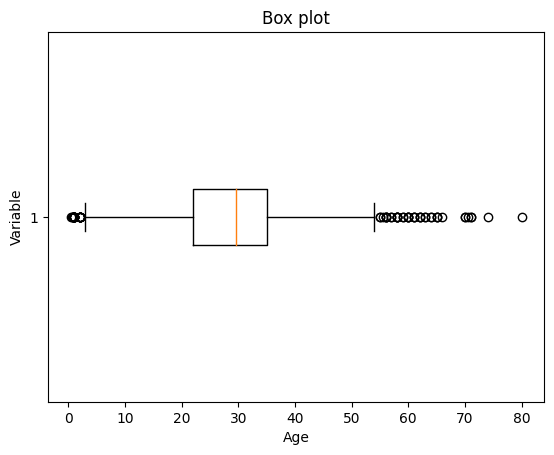

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box plot')
plt.show()
plt.clf()

In the above boxplot the values less than 5 and greater than 55 are all outliers.

In [26]:
# calculate the summary statistics
mean = df3['Age'].mean()
std = df3['Age'].std()

print(mean)
print(std)

29.642092696629216
12.968346294351779


In [27]:
# now we will calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

In [28]:
print(lower_bound)
print(upper_bound)

3.7054001079256587
55.57878528533277


In [29]:
df4 = df3[(df3['Age']>=lower_bound) & (df3['Age']<=upper_bound)]


similarly we can remove the outliers of other columns


data transformation

In [34]:
#  will seperate the independent variables and the target variable.    
x = df3[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] # IMP: we give double brackets while passing the tuple of columns.
y = df3['Survived']

In [36]:
# now we will format the data using minmax scaling which will make the range of the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#numerical columns
num_col_ = [col for col in x.columns if x[col].dtype != 'object']
x1 = x
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/tmp/ipykernel_3845/3132048218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
